## Generate and save predictions

We can generate and save predictions using the ```napari-easy-augment-batch-dl``` GUI, by running notebook ```10_label_predict``` and passing in the model name.

Alternatively we might want to generate prediction with code in a notebook or script.  

First imports...

In [ ]:
from pathlib import Path
from skimage.io import imread, imsave
from tnia.plotting.plt_helper import imshow_multi2d
from cellpose import models
import os
import numpy as np
from tnia.deeplearning.dl_helper import quantile_normalization 


raster_geometry not imported.  This is only needed for the ellipsoid rendering in apply_stardist


Now set parent_path to our project folder, and model name to the model we wish to use

In [11]:
data_path = r'../../data'
parent_path = os.path.join(data_path, 'ladybugs1')

model_path = os.path.join(parent_path, 'models')
model_name = 'cellpose_for_ladybugs'
model = models.CellposeModel(gpu=True, model_type=None, pretrained_model= os.path.join(model_path, model_name))

It can be useful to check the diameter of the model...

In [12]:
print('diameter mean', model.diam_labels, model.diam_mean)

diameter mean 34.059605 30.0


Now loop through all image files at the top level of our project and generate predictions. 

To apply the model to a different set of images, adapt this code to different file locations.  You probably also want to perform analysis (counting, measurements, etc) on the data, this can be achieved by adding analysis code in the below loop.  

We save predictions in a folder called ```{parent_path}\predictions\class_0```, in the lady example we only have one class, but this convention is useful if in the future we train models for multiple classes. 

..\..\data\ladybugs1\37752018_59910952.jpg


c:\Users\bnort\miniconda3\envs\microsam_cellpose\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: ../../data\ladybugs1\predictions\class_0\37752018_59910952.tif is a low contrast image
  return func(*args, **kwargs)


..\..\data\ladybugs1\8220954_10897041.jpg


c:\Users\bnort\miniconda3\envs\microsam_cellpose\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: ../../data\ladybugs1\predictions\class_0\8220954_10897041.tif is a low contrast image
  return func(*args, **kwargs)


..\..\data\ladybugs1\6410573_8085113.jpeg


c:\Users\bnort\miniconda3\envs\microsam_cellpose\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: ../../data\ladybugs1\predictions\class_0\6410573_8085113.tif is a low contrast image
  return func(*args, **kwargs)


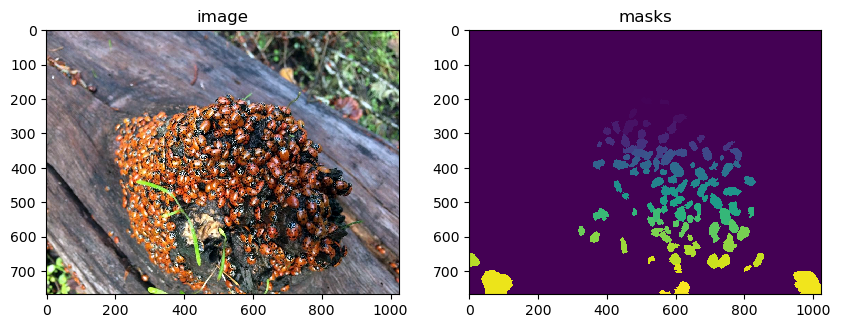

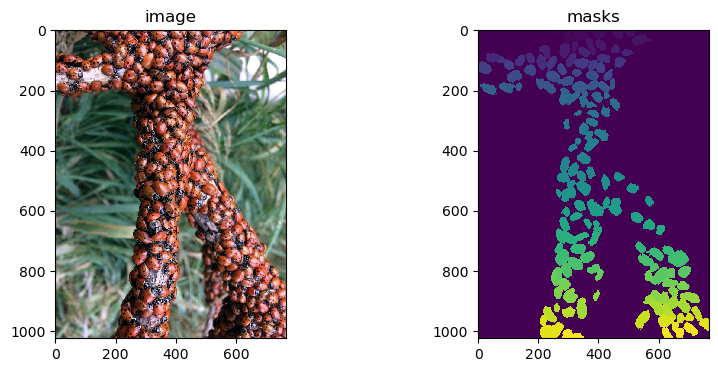

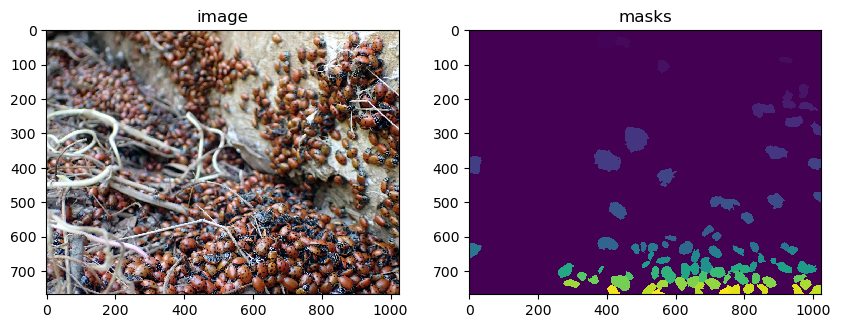

In [13]:

files = list(Path(parent_path).glob('*.jpg'))
files = files + list(Path(parent_path).glob('*.jpeg'))

predictions_path = os.path.join(parent_path, 'predictions', 'class_0')

if not os.path.exists(predictions_path):
    os.makedirs(predictions_path)

for file in files:
    print(file)
    img = imread(file)
    img = quantile_normalization(img, channels=True).astype(np.float32)

    masks = model.eval(img, channels=[0, 0], diameter=30, cellprob_threshold=-2, flow_threshold = 0.4, normalize = False, niter=200)

    ims = [img, masks[0]]
    titles = ['image', 'masks']
    imshow_multi2d(ims, titles, 1, 2)

    imsave(os.path.join(predictions_path, file.stem+'.tif'), masks[0].astype(np.uint16))
